# Tutorial 03

## 0 Review()

In [1]:
# 파이썬 코딩의 기본 3요소
# Data,  함수,  연결부호

In [2]:
# 01 Data

# 숫자 (integer)
# integer(정수) : index, slicing, counting
# float(실수) : 연산

# 문자 (string)
# 'datum' :  문자와 문자의 사칙연산,  Indexing/ Slicing,  Counting....
# data  :  매개변수
# .format( tuple )

# [ list ] :  integer index 값이 숨어있다. (0 ~ -1)
# enumerate()  : enumerate - 열거하다 , 차례로 들다

# { dict } :  { key : value }
# .items()

In [3]:
# 02 연결부호

# '' , ""  문자열 지정 (연산 불가능한 객체)
# . 종속   
# , 병렬나열
# : 내부설계
# = 입력

# is           # if 판단문
# == 대등조건
# != 부 대등조건
# in           # if 판단문, for 반복문
# not in

In [4]:
# 03 함수

# 반복문 : for, while, loop.....   
#     1.list. dict같은 반복 조건이 필요
#     2. 같은 조건/ 함수/ 내용을 반복
#     3. range( start, end, step )

# 판단문 : if    -  True / False
    
# [list 내부활용 함수문]

<p>출처 : http://pbpython.com/pandas-list-dict.html</p>
</br><img src = "http://pbpython.com/images/pandas-dataframe-shadow.png" align="left">

## 1 Pandas and Numpy
 - numpy : 엑셀의 내부 함수 모음 ( pandas의 메소드 함수역활)
 - pandas : 엑셀의 단축키 , sheets 등 부가기능 모음
 - 함께 뒤 섞여서 활용

In [5]:
# 1. Series
# 2. ndarray
# 3. Dataframe : 생성/ 변경 

### 01 'Series'  in Pandas 
일련, 연속 ,한벌 : list 의 확장

#### 1) list 와 비교
list 를 바탕으로 Series 이해하기

In [6]:
lists = [4,2,-1,1,-2,-3,4,5]
lists

[4, 2, -1, 1, -2, -3, 4, 5]

In [7]:
# index 가 옆에 노출되었을 뿐 내용과 개념은 동일!!!
# 그럼에도 왜 쓰냐?? - 1) DataFrame과 호환성   
#                  2) Matrix 등의 연산시 "30배 속도"가 향상 (C++로 연산을 처리)
#                  3) matplotlib 모듈과 연동이 용이

import pandas as pd
data = pd.Series(lists)
data

0    4
1    2
2   -1
3    1
4   -2
5   -3
6    4
7    5
dtype: int64

In [8]:
data.index

RangeIndex(start=0, stop=8, step=1)

In [9]:
data.values

array([ 4,  2, -1,  1, -2, -3,  4,  5])

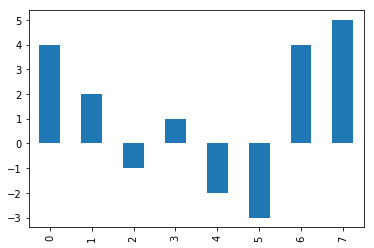

In [10]:
%matplotlib inline
data.plot(kind='bar')

#### 2) dict 와 비교
dict 를 바탕으로 Series 이해하기

In [11]:
# index 에 임의의 이름을 부여 가능
# 그러면서도 순서 속성은 그대로 유지
data = pd.Series([4,7,-5,3], index = ['seoul', 'dajun', 'daegu','busan'])
data

seoul    4
dajun    7
daegu   -5
busan    3
dtype: int64

In [12]:
data.index

Index(['seoul', 'dajun', 'daegu', 'busan'], dtype='object')

In [13]:
data['seoul']

4

#### 3) Series 의 함수적 속성
[ boolean 조건함수 ] 

In [14]:
data * 2

seoul     8
dajun    14
daegu   -10
busan     6
dtype: int64

In [15]:
data [ data > 5 ]

dajun    7
dtype: int64

In [16]:
# Series 가 제공하는 다양한 메소드를 활용가능
data.isnull()

seoul    False
dajun    False
daegu    False
busan    False
dtype: bool

In [17]:
data2 = pd.Series([-4,3,-5], index = ['dajun', 'daegu','busan'])
data + data2

busan   -2.0
daegu   -2.0
dajun    3.0
seoul    NaN
dtype: float64

In [18]:
data2.index = [1,2,3]
data2

1   -4
2    3
3   -5
dtype: int64

## Quiz

    range() 로 10부터 1까지 1씩 감소하는 [ list ] 를 만들고
    이를 Series 로 변환한 뒤, 
    line 차트로 시각화를 하라

In [22]:
# [ i    for i in range(10,0,-1)]

### 02 'DataFrame'  in Pandas 
Excel Sheet 의 모든 것!!!

#### 1) Table 생성하기
Series , list --> DataFrame

In [19]:
pd.DataFrame(data)

,0
seoul,4
dajun,7
daegu,-5
busan,3


In [27]:
data3 = [10,9,8,7,6,5,7]

In [29]:
# Series, list 여러개를 1개의 Table로 구성하기
# 객체가 Series : index 가 일치하지 않아도 조합이 가능 (자동조절)            ex) data, data2
# 객체가 list   : index '길이'가 맞이야만 조합이 가능 (순서는 그대로 삽입)    ex) data3
#              : 컬럼의 모든 데이터를 일괄 처리에 용이 (주로 전처리 작업에 활용)

df = pd.DataFrame( {'first_col': data, 'second_col': data2 , 'third_col': data3 } )
df

/home/markbaum/Python/python36/lib/python3.6/site-packages/pandas/indexes/api.py:71: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


,first_col,second_col,third_col
seoul,4.0,NaN,10
dajun,7.0,NaN,9
daegu,-5.0,NaN,8
busan,3.0,NaN,7
1,NaN,-4.0,6
2,NaN,3.0,5
3,NaN,-5.0,7


#### 2) DataFrame 의 함수적 속성
DataFrame

In [35]:
# df.컬럼명  :  pd.Series()
print(type(df.first_col))
df.first_col

<class 'pandas.core.series.Series'>


seoul    4.0
dajun    7.0
daegu   -5.0
busan    3.0
1        NaN
2        NaN
3        NaN
Name: first_col, dtype: float64

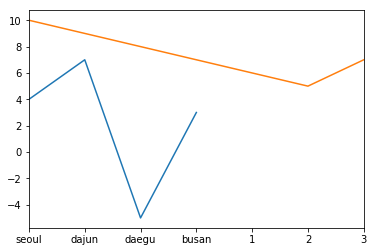

In [46]:
df.first_col.plot(kind='line')
df.third_col.plot(kind='line')

In [52]:
from pandas_datareader import get_data_google
df_samsung = get_data_google('KRX:005930', '2010-01-01')
df_samsung.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

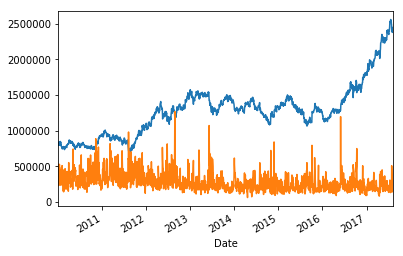

In [54]:
df_samsung.Close.plot(kind='line')
df_samsung.Volume.plot(kind='line')

In [39]:
df

,first_col,second_col,third_col
seoul,4.0,NaN,10
dajun,7.0,NaN,9
daegu,-5.0,NaN,8
busan,3.0,NaN,7
1,NaN,-4.0,6
2,NaN,3.0,5
3,NaN,-5.0,7


In [31]:
df[df<0]

,first_col,second_col,third_col
seoul,NaN,NaN,NaN
dajun,NaN,NaN,NaN
daegu,-5.0,NaN,NaN
busan,NaN,NaN,NaN
1,NaN,-4.0,NaN
2,NaN,NaN,NaN
3,NaN,-5.0,NaN


In [33]:
df[df<0].first_col

daegu   -5.0
Name: first_col, dtype: float64

In [33]:
df[df<0].first_col.dropna()

daegu   -5.0
Name: first_col, dtype: float64

In [21]:
data = [1,2,3,4,5]
pd.Series(data, index = )

SyntaxError: invalid syntax (<ipython-input-21-740ade1c84d9>, line 2)

In [ ]:
import numpy as np

In [ ]:
np.exp(data)

In [ ]:
## 분개 (tuple list의 활용예제)
# asset(자산) = 
# Debit(차변) 
# Credit(대변)
# Cost(비용)
# Capital(자본)

In [ ]:
A_sheet = {'cash':425_000, 'post' : 10_000, 'Check_account':100_000,
           'coupon':40_000, 'div_check':20_000, 'Certi_deposit': 4_000_000}

In [ ]:
# 확장된 회계등식 (매개변수의 활용예제)
# 자산(현금) + 비용 = 부채 + 자본(자본금) + 수익

# 자산 = 부채 + 자본 + 수익 - 비용 (수익 - 비용 = 당기순이익)
# 자산 = 부채 + 자본 + 당기순이익

In [ ]:
## 분개 (tuple list의 활용예제)
# asset(자산) = 
# Debit(차변) 
# credit(대변)
# Cost(비용)
# Capital(자본)

In [ ]:
my_list = [(True, 10), (False, 20), (True,30)]

In [ ]:
for idx in my_list:
    if idx[0] == True:
        print(idx)

In [ ]:
# tuple 은 여러개 모두 가능 
# 하지만 실무에선 list를 더 많이 쓴다 ## tuple 은 Overwriting (수정) 이 불가능
a = (1,2,'a')
len(a)

In [ ]:
a[2]

In [ ]:
Day170101 = {'Debit':{'Cash':100_000_000},
             'Credit':{'Capital':100_000_000}}

In [ ]:
Day170102 = {'Debit':{'Lease':1_000_000},
             'Credit':{'Cash':1_000_000}}

In [ ]:
Day170103 = {'Debit':{'Trans_cost':1_500_000},
             'Credit':{'Cash':1_500_000}}

In [ ]:
Day170104 = {'Debit':{'Payment':700_000},
             'Credit':{'Cash':700_000}}

In [ ]:
Day170105 = {'Debit':{'Machine':9_000_000},
             'Credit':{'Cash_payable':9_000_000}}

In [ ]:
# Merging Data to List
date = [Day170101, Day170102, Day170103, Day170104, Day170105]

result = {}
for day in date:

    for data in day.keys():  # 대변과 차변을 순차적 정리 
        if data not in result:
            result[data] = {}

        for component in day[data]:
            if component not in result[data]:
                result[data][component] = day[data][component]  
            else:
                result[data][component] += day[data][component]
result

In [ ]:
# 함수로 처리 (return 만 출력, 나머지는 메모리에서 삭제)

def financial_summary(datelist):
    result = {}             # '대변','차변' (정의)
    for day in datelist:    # for 반복문으로 '일별' 처리
         
        for data in day.keys():            # '일별'데이터의 '대변'과 '차변' 순차처리
            if data not in result:         # '계정항목' (신규조건)
                result[data] = {}    

            for component in day[data]:                             # '대변/차변의 계정항목' 데이터 순차처리
                if component not in result[data]:                   # '계정항목' 에 데이터를 입력(신규조건) 
                    result[data][component] = day[data][component]  
                else:                                               # '계정항목' 에 데이터를 추가            
                    result[data][component] += day[data][component]
    return result
date = [Day170101, Day170102, Day170103, Day170104, Day170105]
f_sheet = financial_summary(date)

In [ ]:
# Merging Data to DataFrame
import pandas as pd

cols = list(f_sheet.keys())
df = pd.DataFrame(f_sheet, columns=cols)
df

In [ ]:
# DataFrame ',' thousand comma 추가하기
for col in df.columns:
    df[col] = list(map(lambda x: '{:,}'.format(x), list(df[col])))
df

## 2 현금 및 현금성자산 분류
31p - 단순 유무만 판단하면 되는건가??

In [ ]:
name = {'cash':'현금', 'post':'우표', 'Check_account':'당좌수표',
        'coupon':'이자표', 'div_check':'배당표', 'Certi_deposit': '양도성예금증서'}

In [ ]:
A_sheet = {'cash':425_000, 'post' : 10_000, 'Check_account':100_000,
           'coupon':40_000, 'div_check':20_000, 'Certi_deposit': 4_000_000}

In [ ]:
full_item = ['cash', 'post', 'Check_account', 'coupon', 'div_check', 'Certi_deposit'] # 재무제표 item 목록
report_item = ['cash', 'Check_account', 'coupon', 'div_check']  # 현금 및 현금성 자산 item 목록 list

In [ ]:
# condition = list(name.keys()); condition
# condition = [condition[i] for i in [0,2,3,4]]
# condition
A_sheet

In [ ]:
result = {}
for item in report_item:
    result[item] = A_sheet[item]
result

## 3 Pandas, Numpy
데이터 정리

In [ ]:
# 자료의 입력
# 실제 개별 숫자 입력을 프로그래머가 직접 입력하는 경우는 없다 ===> 알바가 더 잘 하고 유용함... 
# 하지만... 1 수정 및 연산을 하려면 기본적인 구조는 알아야 함
#          2 Web Crawling 등.. 기존에 없는 자료 Table을 생성하는 단계에서 구조설계를 위해 필요
#                             또한 내부 등에서도 오류를 수정 보완을 위한 구조수정을 위해 필요

In [ ]:
# 자료형
# 기본 : list, dict, tuple (컴퓨터 연산결과, 자료생성시 잘 사용하지 않는다)
# 확장1(관리_DB) : list  --> dict (index 확장가능 단 순서가 불규칙) 
#                      --> pd.Series (index 확장 및 순서정렬) 
#                      --> pd.DataFrame (index 값이 2 : table)
# 확장2(연산_ML) : list  --> np.array() : Matrix 연산자료 
#                                    string 도 자료는 가능하나,  연산을 위해 float등 숫자를 주로 가능

In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame ,Series

# Series : list의 확장 모듈 ( index 값을 string 등 다양하게 확장가능)
cash_sheet = Series([4000,3000,3500,2000], index=['cash','cash','check','land'])
cash_sheet

### 01. DataFrame
데이터 테이블 만들기

In [ ]:
from pandas import Series, DataFrame

item = {'code':[1,2,3,4],             # 재무상태표, 손익계산서, 현금흐름표, 자본변동표
       'f_sheet':['Balance_sheet','Income_sheet','Cash_sheet','Asset_sheet'],
       'item':['bond','cost','cash','asset'],
       'price':[1500,15000,1000,500]} 

DataFrame(item)

In [ ]:
# DataFrame 의 순서 바꾸기 1   # column 잉름으로 순서바꾸기/ 선별하기 
DataFrame(item, columns=['code','price','item','f_sheet'])

In [ ]:
# DataFrame 의 순서 바꾸기 2  # column 의 index 로 순서바꾸기/ 선별하기
df = DataFrame(item)
df.iloc[:,[3,2,1,0]]

### 02. DataFrame 편집
데이터 테이블 컬럼별 데이터 관리

In [ ]:
data = """
일자,적용,입고수량,입고단가,입고금액,출고수량,출고단가,출고금액
2017-03-01,전월이월,5,20000,100000,0,0,0
2017-03-09,매입,15,18000,270000,0,0,0
2017-03-16,매출,0,0,0,5,20000,100000
2017-03-16,매출,0,0,0,5,18000,90000
2017-03-24,매입,20,22000,440000,0,0,0
2017-03-29,매출,0,0,0,10,18000,180000
2017-03-29,매출,0,0,0,2,22000,44000"""

In [ ]:
from io import StringIO
import pandas as pd
data = StringIO(data)
df = pd.read_csv(data, sep=","); df

In [ ]:
df.columns

In [ ]:
df.입고금액.sum()

In [ ]:
df.입고금액.cumsum()

In [ ]:
df.입고금액.sum() - df.출고금액.sum()

###  선입선출법을 활용한 재고자산 단위원가 결정방법
45p
1. 출고수량의 합계를 구한다.
2. 입고수량의 누적 column 을 구한다.
3. 출고순서 누적 column 을 구한다.
4. 출고순서 누적을 한행씩 밑으로 내리는 shift column 을 구한다.
5. 출고순서_개별 column 을 구한다.
6. 출고금액을 구한다.

## 4 객체지향 프로그래밍
def: 함수적 프로그래밍 --> class: 객체지향 프로그래밍

    1.def : 함수 1개의 사용자 함수명/ 1개의 기능만 가능
    2.class : class 는 여러개 객체 및 여려개 함수를 포함한다 (1개면 함수를 쓰면 됨)
              class 자신을 여러개의 이름으로 분산해서 사용 class 내부 self 매개변수의 역활
              작은 독립적인 프로그래밍 ex) 자동차의 엔진/ 미션/ 반제품들 - 경험이 없어서 이해가 어려움

In [ ]:
class Stamp:
    name = 'Erdos Kim'
    def description(self):
        print('%s \'s stamp is good shaped..'%self.name)

In [ ]:
a = Stamp()  # class 객체를 생성

In [ ]:
a.description()

In [ ]:
rule = set()   #  입력순서를 무시 : default로 정렬

In [ ]:
rule.add('B'); rule

In [ ]:
rule.add('A'); rule

    <사례1> 기계장치 A의 장부금액은 ₩80,000이다. 이 기계장치는 ₩88,000으로 재평가되었다.
    직전 재평가시 당기손익으로 인식한 재평가감소액 ₩5,000이 있었다.
    
    자산의 장부금액이 재평가로 인하여 증가된 경우에 그 증가액은 기타포괄손익으로 인식하고
    재평가잉여금의 과목으로 자본에 가산한다. 그러나, 동일한 자산에 대하여 이전에 당기손익으
    로 인식한 재평가감소액이 있다면 그 금액을 한도로 재평가증가액만큼 당기손익으로 인식한다.

    <<회계처리>>>
    (차) 기계장치  (단위:원) 8,000
    (대) 재평가이익(당기손익) 5,000
    재평가잉여금(기타포괄손익) 3,000

    <사례2> 기계장치 B의 장부금액은 ₩60,000이다. 이 기계장치는 ₩50,000으로 재평가되었다.
    직전 재평가로 재평가잉여금이 ₩7,000이 있었다.
    
    2. 자산의 장부금액이 재평가로 인하여 감소된 경우에 그 감소액은 당기손익으로 인식한다. 그러
    나 그 자산에 대한 재평가잉여금의 잔액이 있다면 그 금액을 한도로 재평가감소액을 기타포괄
    손익으로 인식한다. 재평가감소액을 기타포괄손익으로 인식하는 경우 재평가잉여금의 과목으로
    자본에 누계한 금액을 감소시킨다.
    
    <<회계처리 (단위:원)>>
    (차) 재평가잉여금(기타포괄손익) 7,000
    재평가손실(당기손익)          3,000
    (대) 기계장치              10,000

    <사례3> 기계장치 B의 장부금액은 ₩56,000이다. 이 기계장치는 ₩50,000으로 재평가되었다.
    직전 재평가로 재평가잉여금이 ₩7,000이 있었다.
    
    자산의 장부금액이 재평가로 인하여 감소된 경우에 그 감소액은 당기순익으로 인식한다. 그러
    나 그 자산에 대한 재평가잉여금의 잔액이 있다면 그 금액을 한도로 재평가감소액을 기타포괄
    손익으로 인식한다. 재평가감소액을 기타포괄손익으로 인식하는 경우 재평가잉여금의 과목으로
    자본에 누계한 금액을 감소시킨다.

    <<회계처리 (단위:원)>>
    (차) 재평가잉여금(기타포괄손익)  6,000
    (대) 기계장치                6,000

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris_dataset = load_iris()

In [ ]:
iris_dataset.keys()

In [ ]:
iris_dataset['data']

In [ ]:
from sklearn.lda import LDA
lda = LDA(n_components = 2)

In [ ]:
X_train_lda = lda.fit_transform(X_train_lda, y_)

In [ ]:
name_mask = {'cash':True, 'post':False, 'Check_account':True,
        'coupon':True, 'div_check':True, 'Certi_deposit':False}

In [ ]:
A_sheet

In [ ]:
list(name.keys())

In [ ]:
df.columns[0] = list(map(lambda x: '{:,}'.format(x), list(df[df.columns[0]])))

In [ ]:
result['Credit']

In [ ]:
# 이를 실행 후 함수로 만들기

In [ ]:
Day170102

In [ ]:
a = 1000000
a

In [ ]:
print("{:2f}".format(10000))

In [ ]:
## [list]
list()

In [ ]:
a = []

In [ ]:
a.append('test')